# 元胞自动机 Cellular Automata

xyfJASON

## 1 理论

元胞自动机的思想很简单，在一个 $n$ 维网格内有一些元胞，每个元胞可以取有限种状态，给定状态转换的规则（依赖于元胞当前状态和邻居当前状态），则在下一个时刻，元胞们依据规则转换状态，就构成了一个元胞自动机。

一些经典的元胞自动机：

- 生命游戏：二维平面，每个细胞两种状态——生/死，下一时刻的状态受其周围 $8$ 个细胞的状态而定：
  1. 如果一个细胞周围有 $3$ 个细胞为生，则该细胞为生；
  2. 如果一个细胞周围有 $2$ 个细胞为生，则该细胞的生死状态保持不变；
  3. 在其它情况下，该细胞为死。
- NaSch：一维模拟车辆交通模型。每个位置有两种状态——有车/无车，每辆车具有位置 $x$ 和速度 $v$ 两个属性，$v\in[0, v_\max]$，更新规则为：
  1. 加速：$v_n\gets \min(v_{n}+1,\,v_\max)$
  2. 减速：$v_n\gets\min(v_n,\,x_{n+1}-x_n-1)$，保证不碰撞
  3. 随机慢化：以概率 $p$ 慢化，$v_n\gets \max(v_n-1, 0)$
  4. 位置更新：$x_n\gets x_n+v_n$

## 2 代码模板

见同文件下的 `cellauto.py` 模块。

## 3 例题

### 3.1 例一——生命游戏

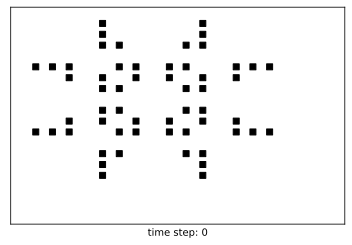

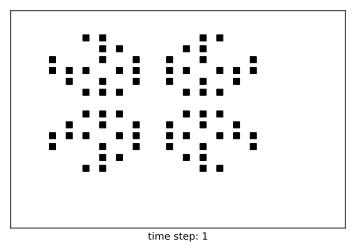

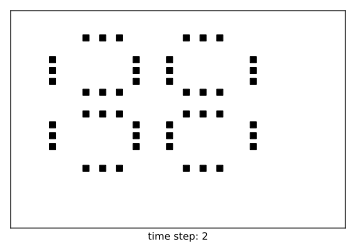

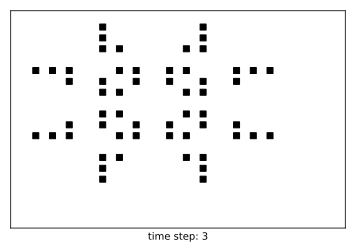

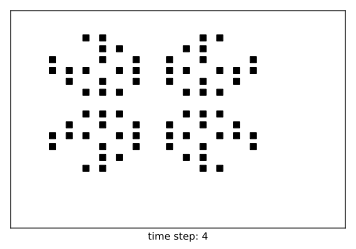

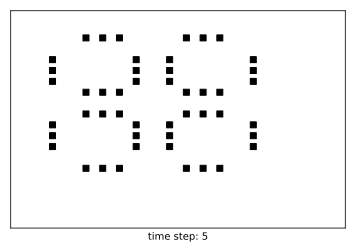

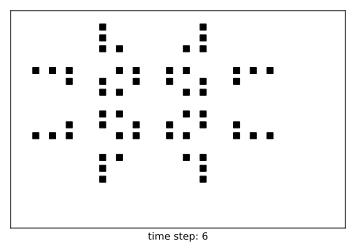

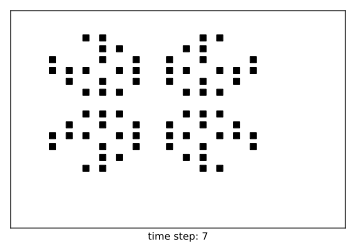

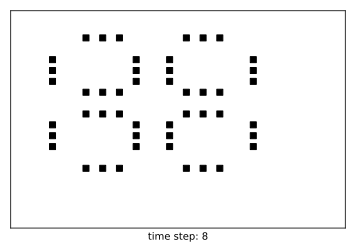

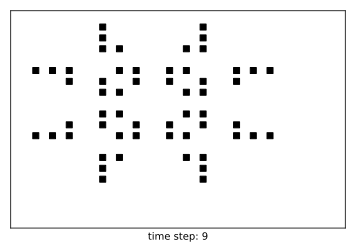

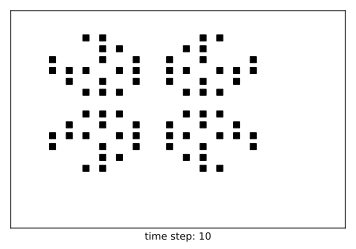

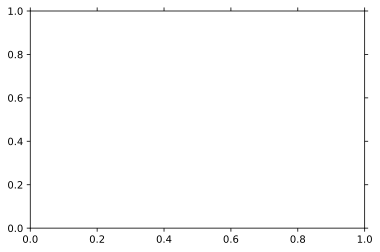

In [1]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
from cellauto import CellularAutomata2D

class LifeGame(CellularAutomata2D):
    def gen_init_state(self) -> np.ndarray:
        init = np.zeros(self.sz_grid)
        init[[1, 1, 2, 2, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
              7, 7, 7, 7, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
              11, 11, 11, 11, 11, 13, 13, 13, 13, 14, 14, 15, 15],
             [5, 11, 5, 11, 5, 6, 10, 11, 1, 2, 3, 6, 7, 9, 10, 13, 14, 15, 3, 5, 7, 9, 11, 13, 5, 6, 10, 11,
              5, 6, 10, 11, 3, 5, 7, 9, 11, 13, 1, 2, 3, 6, 7, 9, 10, 13, 14, 15, 5, 6, 10, 11, 5, 11, 5, 11]] = 1
        return init

    def next_state_single_cell(self, cur_state: np.ndarray, pos: tuple[int, int]) -> int:
        cnt_alive = 0
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if i == 0 and j == 0:
                    continue
                cnt_alive += cur_state[(pos[0] + i) % self.sz_grid[0],
                                       (pos[1] + j) % self.sz_grid[1]]
        return 1 if cnt_alive == 3 else (cur_state[pos[0], pos[1]] if cnt_alive == 2 else 0)

game = LifeGame((20, 20))
game.run(max_iters=10, show=True, pause_time=0.1);

### 3.2 例二——$\textbf{NaSch}$ 单车道交通模型

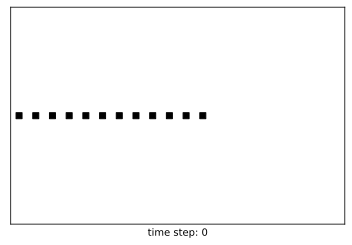

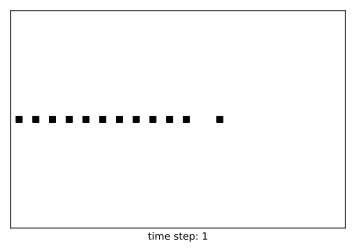

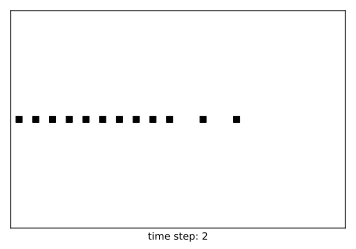

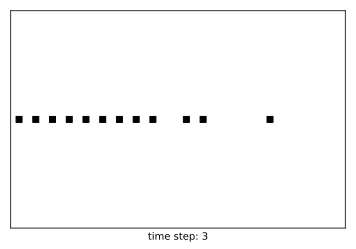

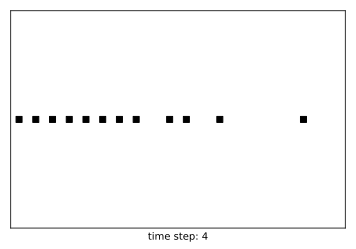

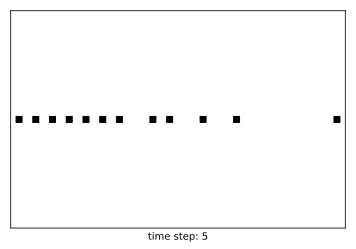

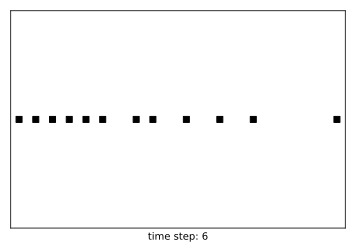

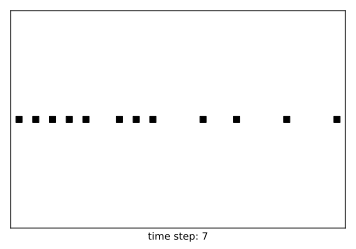

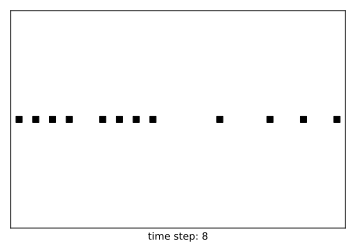

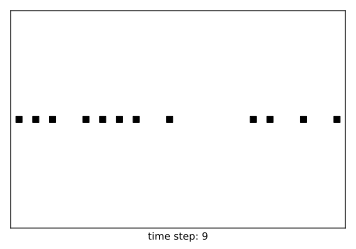

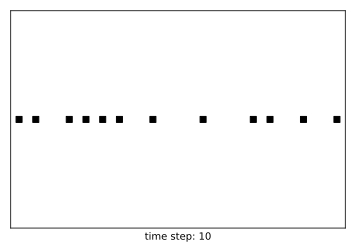

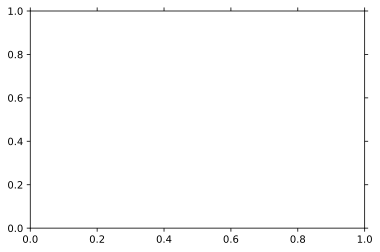

In [2]:
from cellauto import CellularAutomata2D

class NaSch(CellularAutomata2D):
    def __init__(self, sz_grid: int, n_cars: int, vmax: int, p_slow: float) -> None:
        super().__init__((1, sz_grid))
        self.n_cars = n_cars
        self.vmax = vmax
        self.p_slow = p_slow
        # self.x = np.random.choice(sz_grid, size=n_cars, replace=False)
        # self.x = np.sort(self.x)  # random initialization
        self.x = np.arange(n_cars)  # queue initialization
        self.v = np.zeros(n_cars)

    def gen_init_state(self) -> np.ndarray:
        state = np.zeros(self.sz_grid[1])
        state[self.x.astype(int)] = 1
        return state[np.newaxis, :]

    def next_state_global(self, cur_state: np.ndarray) -> np.ndarray:
        self.v = np.minimum(self.v + 1, self.vmax)
        self.v = np.minimum(self.v, (np.concatenate((self.x[1:], self.x[0:1])) -
                                     self.x + self.sz_grid[1] - 1) % self.sz_grid[1])
        slow_mask = np.random.rand(self.n_cars) <= self.p_slow
        self.v[slow_mask] = np.maximum(self.v[slow_mask] - 1, 0)
        self.x = (self.x + self.v) % self.sz_grid[1]
        return self.gen_init_state()

nasch = NaSch(sz_grid=20, n_cars=12, vmax=5, p_slow=0.3)
nasch.run(max_iters=10, show=True, pause_time=0.1);